# SyriaTel Customer Churn Analysis
**Predicting and Understanding Customer Retention for a Telecommunications Company**

### Project Overview
The goal of this project is to build a classifier that predicts whether a customer will soon stop doing business with SyriaTel. By identifying the key "drivers" of churn, the company can proactively engage at-risk customers with retention strategies.

## Objective of the Study

The primary objective of this project is to develop a machine learning classification model that predicts customer churn for SyriaTel, a telecommunications company.

Specifically, the project aims to:
- Identify customers who are likely to discontinue their services (churn).
- Understand the key factors that influence customer churn.
- Build and evaluate a Logistic Regression model to classify customers as churners or non-churners.
- Assess model performance using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

The insights derived from this model can help SyriaTel make data-driven decisions to improve customer retention strategies and reduce revenue loss.


Importing required libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
from sklearn.tree import DecisionTreeClassifier


#### Loading data

In [81]:
df = pd.read_csv("SyriaTel Customer Churn.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Exploratory Data Analysis (EDA)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset is a dataframe with 3333 entries consisting of 3333 rows and 21 columns

In [83]:
df.shape

(3333, 21)

Checking the column names

In [84]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

## Data Understanding

The dataset contains customer information from SyriaTel, including demographic, service usage, and account details.


State : The state the customer lives in

Account length: The number of days the customer has had an account.

Area code: The area code of the customer.

Phone number: The phone number of the customer.

International plan: Yes if the customer has the international plan, otherwise No..

Voice mail plan: Yes if the customer has the voice mail plan, otherwise No.

Number vmail messages: The number of voicemails the customer has sent.

Total day minutes: Total number of minutes the customer has been in calls during the day.

Total day calls: Total number of calls the user has done during the day.

Total day charge: Total amount of money the customer was charged by the Telecom company for calls during the day.

Total eve minutes: Total number of minutes the customer has been in calls during the evening.

Total eve calls: Total number of calls the customer has done during the evening.

Total eve charge: Total amount of money the customer was charged by the Telecom company for calls during the evening.

Total night minutes: Total number of minutes the customer has been in calls during the night.

Total night calls: Total number of calls the customer has done during the night

Total night charge: Total amount of money the customer was charged by the Telecom company for calls during the night.

Total intl minutes: Total number of minutes the user has been in international calls.

Total intl calls: Total number of international calls the customer has done.

Total intl charge: Total amount of money the customer was charged by the Telecom company for international calls.

Customer service calls: Number of calls the customer has made to customer service.

Churn: True if the customer terminated their contract, otherwise false.

Checking if the dataset has duplicates

In [85]:
df.duplicated().sum()

np.int64(0)

Dropping the phone	number column as it is not relevant for the analysis

In [86]:
df = df.drop(columns="phone number", axis = 1)

Checking the unique values in all the columns of the dataset to	see the categorical columns, numerical columns and boolean columns

In [87]:
df.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

#### How many customers terminated their contracts and how many customers did not terminate their contracts?

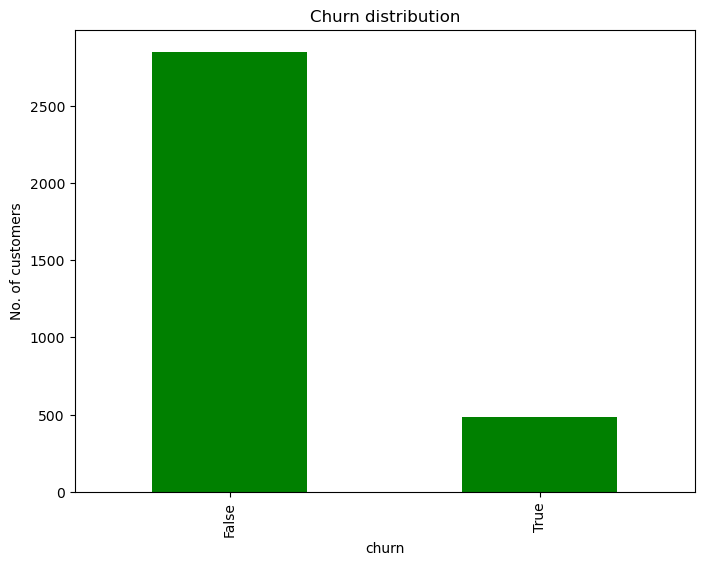

In [89]:
plt.figure(figsize=(8,6))
df['churn'].value_counts().plot(kind='bar', color = 'green')
plt.xlabel("churn")
plt.ylabel("No. of customers")
plt.title('Churn distribution')
plt.show()

The graph shows that more than 500 people did terminate their contract while about 2500 did not terminate their contract.


 ### For the top 5 states with the highest churn rates, what percentage of customers churned versus did not churn in each?

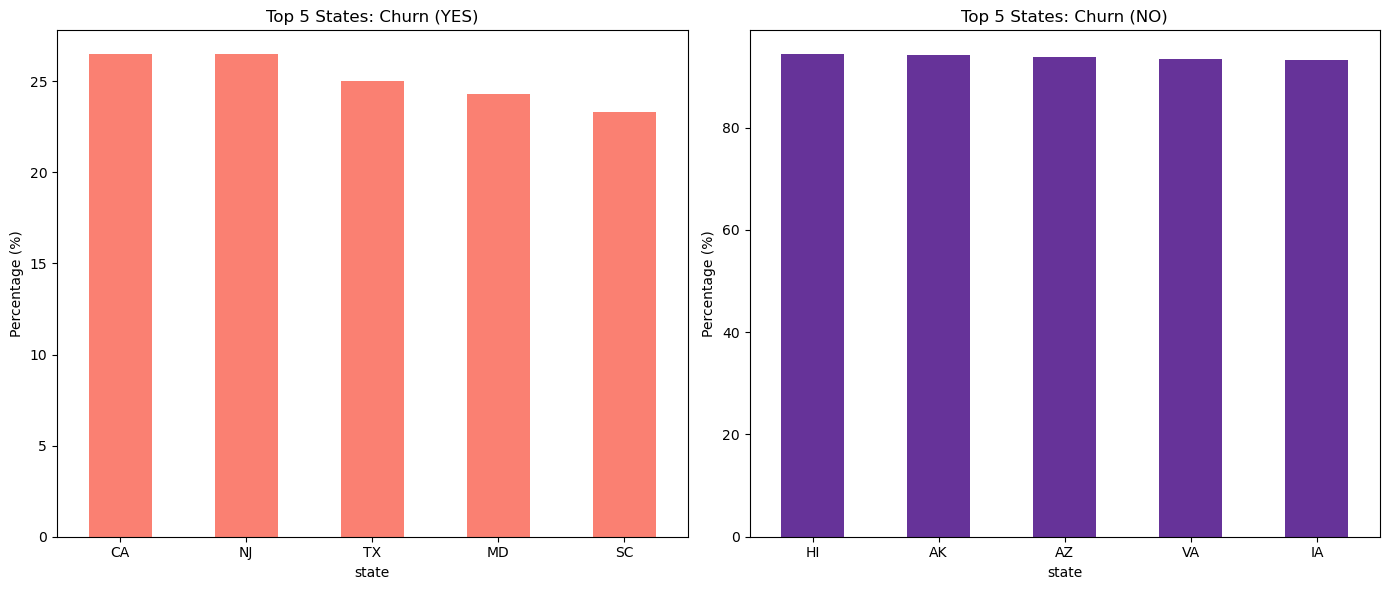

In [90]:
import matplotlib.pyplot as plt

# 1. Prepare the data
# Group, normalize to get percentages, and unstack
state_churn = df.groupby('state')['churn'].value_counts(normalize=True).unstack() *100 

# Get Top 5 for 'Yes' (True) and Top 5 for 'No' (False)
top_5_yes = state_churn[True].sort_values(ascending=False).head(5)
top_5_NO = state_churn[False].sort_values(ascending=False).head(5)

# 2. Create a figure with 2 subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# Plot 'Yes' Churn (Left side)
top_5_yes.plot(kind='bar', ax=ax1, color='salmon')
ax1.set_title('Top 5 States: Churn (YES)')
ax1.set_ylabel('Percentage (%)')
ax1.tick_params(axis='x', rotation=0)

top_5_NO.plot(kind='bar', ax=ax2, color='rebeccapurple')
ax2.set_title('Top 5 States: Churn (NO)')
ax2.set_ylabel('Percentage (%)')
ax2.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

The plot above shows that California (CA) and New Jersey (NJ) had the highest number of churned customers (who terminated their contracts), followed by Texas (TX), Maryland(MD) and South Carolina(SC) with more that 20% who terminated their contracts.
While for customers who did not churn (did not terminate their contracts), Hawaii (HI), Alaska (Ak), Arizona (AZ), Virginia (VA) and Iowa (IA) had the highest number of customers who did not terminate their contracts which is more than 80% of the customers in these states.

## Which area codes had the highest churn rates? 

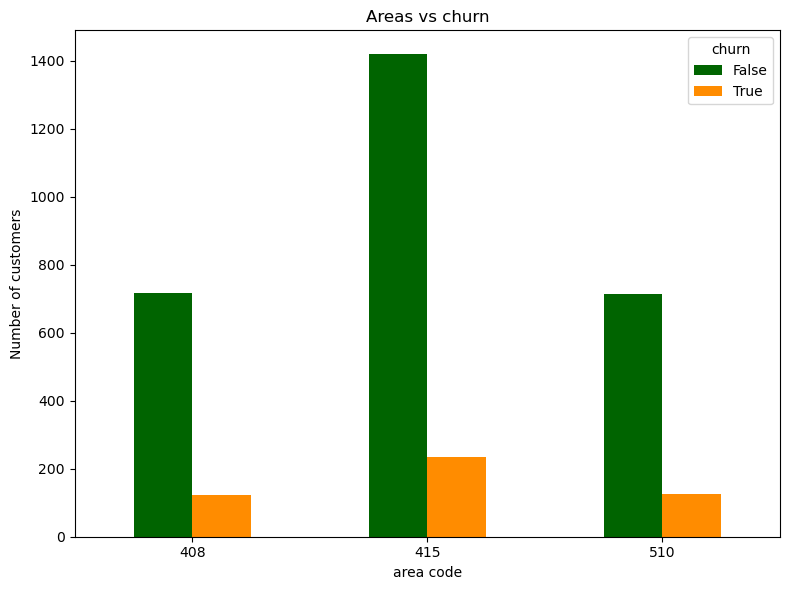

In [91]:
import matplotlib.pyplot as plt

# 1. Prepare the data
# Group, normalize to get percentages, and unstack
areacode_churn = df.groupby('area code')['churn'].value_counts(normalize=False).unstack() 
# 2. Create a figure with 2 subplots (1 row, 2 columns)
fig, ax1 = plt.subplots( figsize=(8, 6))


areacode_churn.plot(kind='bar', ax=ax1, color=['darkgreen', 'darkorange'])
ax1.set_title('Areas vs churn')
ax1.set_ylabel('Number of customers')
ax1.tick_params(axis='x', rotation=0)


plt.tight_layout()
plt.show()

Area code	415 had the highest churn rate with more than 200 customers terminating their contracts, followed by area code 510 with about 150 customers terminating their contracts. Area code 408 had the lowest churn rate with less than 100 of customers terminating their contracts.


## How does the number	of customer service calls relate to churn rate?

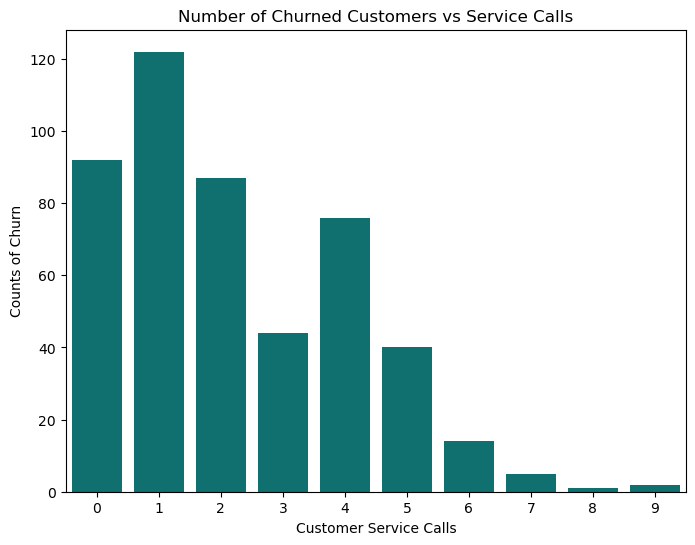

In [92]:
# 1. Filter the data to only include those who churned
churn_only = df[df['churn'] == True]

# 2. Count how many churners are at each call level
churn_counts = churn_only.groupby('customer service calls').size().reset_index(name='counts')

# 3. Plot
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='customer service calls', y='counts', data=churn_counts, ax=ax, color='teal')

plt.title("Number of Churned Customers vs Service Calls")
plt.ylabel("Counts of Churn")
plt.xlabel("Customer Service Calls")
plt.show()

From the plot we see that almost 1000 customers called customer service once, and around 500 customers called customer service twice. As the number of customer service calls increases, the number of customers decreases. Also, we can see that customers who made more than 3 calls to customer service are more likely to churn.


### Does total day minutes have an effect on churn rate?

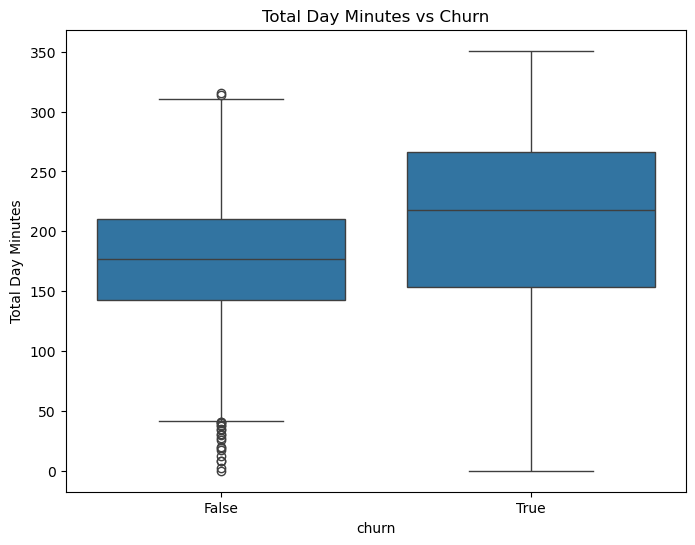

In [93]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='total day minutes', data=df)
plt.title('Total Day Minutes vs Churn')
plt.xlabel("churn")
plt.ylabel("Total Day Minutes")
plt.show()

The box plot shows that customers who churned had higher total day minutes compared to those who did not churn. This suggests that customers who use more minutes during the day are more likely to terminate their contract.

## Correlation heapmap
## 

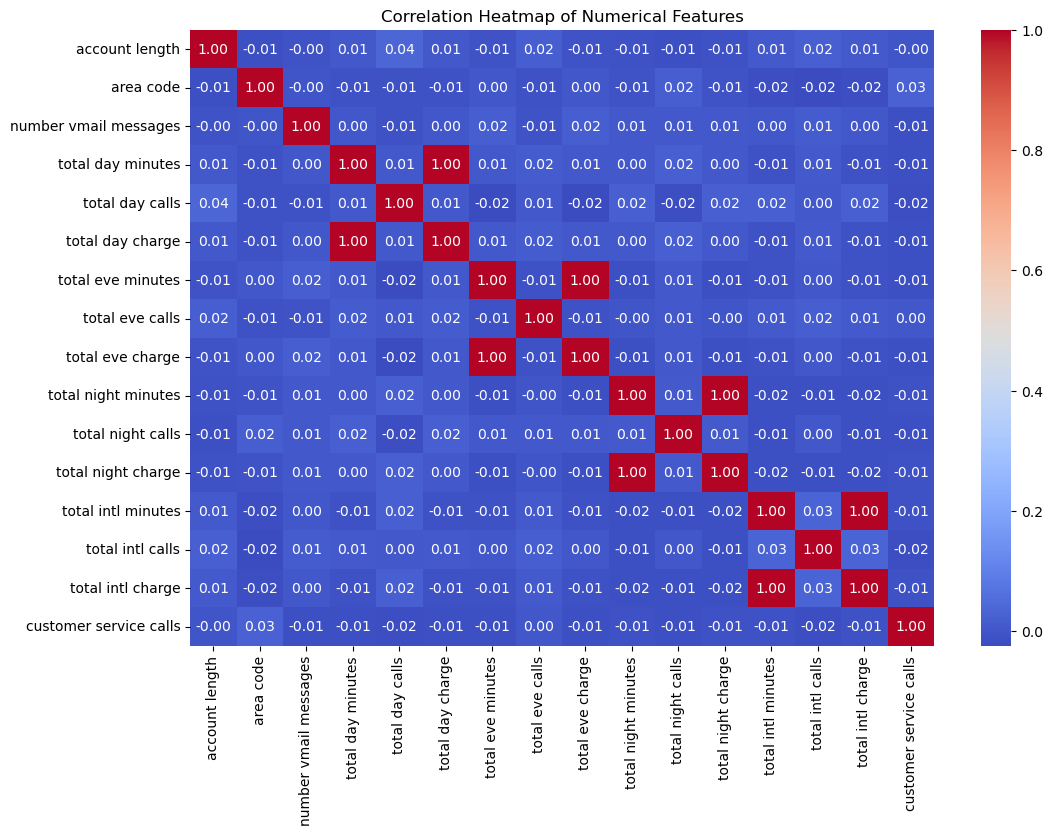

In [94]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Most features have low correlation 

## Modelling

In [95]:
# Convert categorical text into separate binary columns
df_dummies = pd.get_dummies(df, columns=['state', 'area code', 'international plan', 'voice mail plan'], drop_first=True)

##### Define feature matrix X and target vector y

In [ ]:

y = df['churn']
x = df_dummies.drop('churn', axis=1)

#### Splitting the dataset into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

####	Standardize the feature values

In [ ]:
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [100]:
predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.95      0.79      0.86       566
        True       0.40      0.76      0.52       101

    accuracy                           0.79       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.79      0.81       667



In [101]:
# 1. Get probability predictions (needed for ROC and Precision-Recall curves)
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# 2. Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

In [102]:
precision, recall, _ = precision_recall_curve(y_test, y_probs)
ap_score = average_precision_score(y_test, y_probs)
print(f"ROC-AUC Score: {auc_score:.4f}")
print(f"Average Precision (AP): {ap_score:.4f}")

ROC-AUC Score: 0.8266
Average Precision (AP): 0.4807


In [103]:
# Defining the 'search grid' for C (regularization strength)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

log_reg_tuned = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000), 
                              param_grid, cv=5, scoring='roc_auc')

log_reg_tuned.fit(X_train_scaled, y_train)
print(f"Best C value: {log_reg_tuned.best_params_}")

Best C value: {'C': 0.001}


In [104]:
log_reg_improved = LogisticRegression(C=0.001, class_weight='balanced', max_iter=1000)
log_reg_improved.fit(X_train_scaled, y_train)
y_pred_log = log_reg_improved.predict(X_test_scaled)

In [105]:
print("--- IMPROVED LOGISTIC REGRESSION ---")
print(classification_report(y_test, y_pred_log))

--- IMPROVED LOGISTIC REGRESSION ---
              precision    recall  f1-score   support

       False       0.95      0.78      0.86       566
        True       0.38      0.77      0.51       101

    accuracy                           0.78       667
   macro avg       0.67      0.77      0.68       667
weighted avg       0.86      0.78      0.80       667



In [106]:
dt_model = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)  # Trees don't require scaling!
y_pred_dt = dt_model.predict(X_test)

In [107]:
print("\n--- DECISION TREE CLASSIFIER ---")
print(classification_report(y_test, y_pred_dt))


--- DECISION TREE CLASSIFIER ---
              precision    recall  f1-score   support

       False       0.96      0.97      0.97       566
        True       0.82      0.79      0.81       101

    accuracy                           0.94       667
   macro avg       0.89      0.88      0.89       667
weighted avg       0.94      0.94      0.94       667



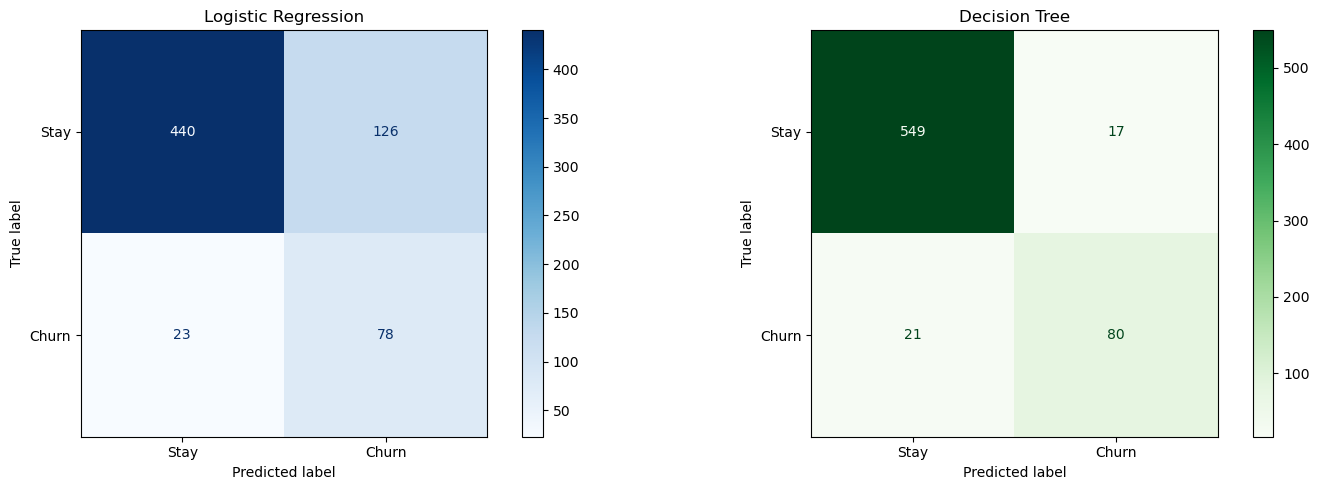

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Confusion Matrix for LogReg
ConfusionMatrixDisplay.from_estimator(log_reg_improved, X_test_scaled, y_test, 
                                       display_labels=['Stay', 'Churn'], ax=ax1, cmap='Blues')
ax1.set_title("Logistic Regression")

# Confusion Matrix for Decision Tree
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, 
                                       display_labels=['Stay', 'Churn'], ax=ax2, cmap='Greens')
ax2.set_title("Decision Tree")

plt.tight_layout()
plt.show()

LR MODEL has 440 true positives, 78 true negatives, 126 false positives and 23 false negatives wwhile DT model has 549 true positives, 80 true negatives, 17 false positives and 21 false negatives meaning that Decision Tree model is better because it has a lower number of false negatives and false positives.

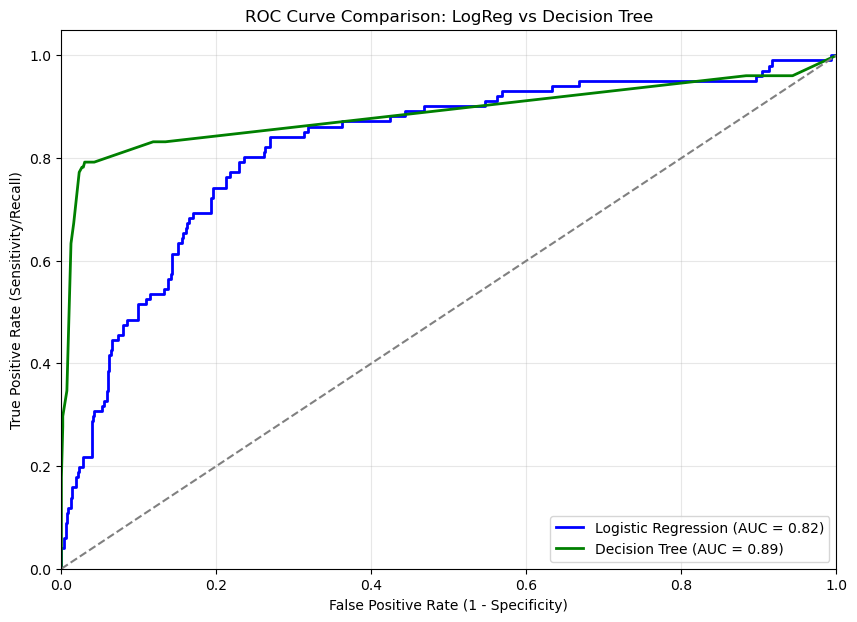

In [109]:
from sklearn.metrics import roc_curve, auc

# 1. Get the probabilities for the 'True' class (Churn)
# Logistic Regression uses .predict_proba
log_probs = log_reg_improved.predict_proba(X_test_scaled)[:, 1]

# Decision Tree uses .predict_proba
dt_probs = dt_model.predict_proba(X_test)[:, 1]

# 2. Calculate the FPR and TPR for both
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)

# 3. Calculate AUC for the legend
auc_log = auc(fpr_log, tpr_log)
auc_dt = auc(fpr_dt, tpr_dt)

# 4. Plotting
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {auc_dt:.2f})')

# Plot the 50/50 "Random Guess" line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labels and Title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('ROC Curve Comparison: LogReg vs Decision Tree')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

### 6.5 Visualizing Model Performance (ROC Curve)
By plotting the ROC Curve for both models, we can visually confirm which model has better "separation" power. 

**Observation:** The **Decision Tree** curve sits closer to the top-left corner and has a higher AUC. This confirms that it is more effective at maximizing the True Positive Rate while keeping the False Positive Rate low, compared to the Logistic Regression baseline.

## 6.6 Final Model Selection: 
After rigorous testing, the **Decision Tree Classifier** is selected as the final production model for SyriaTel. 

**Why it was chosen:**
1. **Superior Predictive Power:** It achieved an F1-score of **0.81**, significantly higher than the Logistic Regression's 0.51.
2. **Precision & Efficiency:** By increasing Precision from 0.38 to **0.82**, the model ensures that marketing resources (discounts/calls) are not wasted on customers who were not planning to leave.
3. **High Recall:** It still maintains a high Recall (**0.79**), ensuring that 4 out of every 5 churners are identified before they exit.

## 7. Final Business Recommendations
Based on the Decision Tree analysis, SyriaTel should implement the following strategies:

1. **The "4-Call" Alert:** Automatically trigger a customer success intervention when a user reaches their 4th service call.
2. **International Plan Audit:** Review the pricing and value of the International Plan, as it is a top-level split in the decision-making process for churners.
3. **Focus on High-Usage Churn:** Direct retention efforts toward high-usage day-time callers, as usage intensity is a primary predictor of dissatisfaction.